Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict
[<matplotlib.lines.Line2D object at 0x7fd3345f46d0>, <matplotlib.lines.Line2D object at 0x7fd3345f49a0>]


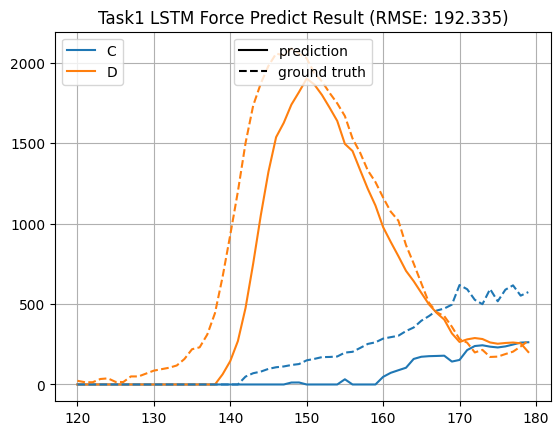

In [42]:
from fsr_predictor import get_best_checkpoint
from fsr_plot import plot_list, plot_force, plot_coord, plot_cop
from fsr_trainable import FSR_Trainable
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections.abc import Sequence
import numpy as np

ax = plt.subplot()
experiment = 'FSR_Trainable_2023-08-10_18-18-32'
index = 19

def force_plot(ax, experiment:str, index:int, task:int, time:Sequence=None, labels:Sequence='ABCDEF', postprocess:bool=False, standard='metric'):
    assert task in [1, 2, 4, 5]
    checkpoint, metric = get_best_checkpoint(experiment, standard, 'min')

    trainer = FSR_Trainable(config=metric['config'])
    trainer.restore(checkpoint)
    pred, y = trainer.eval()[index]
    if task in [1, 4]:
        pred = pred[:, :6]
        y = y[:, :6]

    time = time or range(0, len(pred))
    time = np.array(time)
    time = time[(0 <= time) & (time < len(pred))]

    if postprocess:
        pred[pred < 0] = 0
        y[y < 0] = 0

    ax = plt.subplot()
    for label in labels:
        ax.plot(time, pred[time, ord(label) - ord('A')], label=label)

    handles, _ = ax.get_legend_handles_labels()
    for label, handle in zip(labels, handles):
        ax.plot(time, y[time, ord(label) - ord('A')], label=label, c=handle.get_color(), linestyle='--')
    
    legend = plt.legend(handles, list(labels), loc='upper left')
    ax.legend([Line2D([], [], color='black'), Line2D([], [], linestyle='--', color='black')], ['prediction', 'ground truth'], loc='upper center')
    ax.add_artist(legend)

    title_value = (metric['rmse_force'] ** 2 / 6) ** 0.5
    title_model = metric['config']['model']
    if title_model == 'fsr_model.LSTM':
        title_model = 'LSTM'
    elif title_model == 'fsr_model.CNN_LSTM':
        title_model = 'CNN-LSTM'
    elif title_model == 'fsr_model.ANN':
        title_model = 'Perceptron'
    else:
        raise ValueError(f'unknown model {title_model}')
    title = f'Task{task} {title_model} Force Predict Result (RMSE: {title_value:.3f})'
    ax.set_title(title)
    ax.grid()
force_plot(ax, experiment, index, labels='CD', postprocess=True, time=range(120, 180), task=1)

Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict


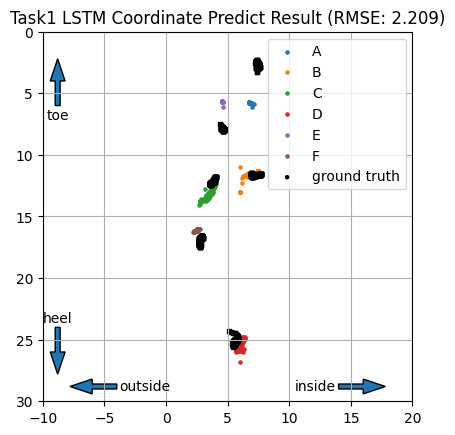

In [123]:
from fsr_predictor import get_best_checkpoint
from fsr_plot import plot_list, plot_force, plot_coord, plot_cop
from fsr_trainable import FSR_Trainable
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import PathCollection
from collections.abc import Sequence
import numpy as np
from copy import copy

ax = plt.subplot()
experiment = 'FSR_Trainable_2023-08-10_18-18-32'
index = 19

def coord_plot(ax, experiment:str, index:int, task:int, time:Sequence=None, labels:Sequence='ABCDEF', postprocess:bool=False, standard='metric'):
    assert task in [1, 3, 4, 6]
    checkpoint, metric = get_best_checkpoint(experiment, standard, 'min')

    trainer = FSR_Trainable(config=metric['config'])
    trainer.restore(checkpoint)
    pred, y = trainer.eval()[index]
    if task in [1, 4]:
        pred = pred[:, 6:]
        y = y[:, 6:]

    time = time or range(0, len(pred))
    time = np.array(time)
    time = time[(0 <= time) & (time < len(pred))]

    # if postprocess:
    #     pred[pred < 0] = 0
    #     y[y < 0] = 0

    ax.set_xlim(-10, 20)
    ax.set_ylim(30, 0)
    ax.set_aspect('equal')

    for label in labels:
        i = ord(label) - ord('A')
        ax.scatter(y[time, i], y[time, i + 6], s=5, label=label)
        
    handles = ax.get_legend_handles_labels()[0]
    for label, handle in zip(labels, handles):
        i = ord(label) - ord('A')
        ax.scatter(pred[time, i], pred[time, i + 6], s=5, label=label, marker=',', c='black')

    handles.append(copy(handles[0]))
    handles[-1].set_hatch('*')
    handles[-1].set_color('black')
    ax.legend(handles, list(labels) + ['ground truth'])
    margin1 = 1.2
    margin2 = 6
    margin3 = 0.2
    arrow_length = 2
    arrow_width = .4
    ax.arrow(x=-10+margin1, y=0+margin2, dx=0, dy=-arrow_length, width=arrow_width)
    ax.annotate('toe', xy=(-10+margin1, 0+margin2+margin3), ha='center', va='top')
    ax.arrow(x=-10+margin1, y=30-margin2, dx=0, dy=arrow_length, width=arrow_width)
    ax.annotate('heel', xy=(-10+margin1, 30-margin2-margin3), ha='center', va='bottom')
    ax.arrow(x=-10+margin2, y=30-margin1, dx=-arrow_length, dy=0, width=arrow_width)
    ax.annotate('outside', xy=(-10+margin2+margin3, 30-margin1), ha='left', va='center')
    ax.arrow(x=20-margin2, y=30-margin1, dx=arrow_length, dy=0, width=arrow_width)
    ax.annotate('inside', xy=(20-margin2-margin3, 30-margin1), ha='right', va='center')

    title_value = metric['rmse_coord']
    title_model = metric['config']['model']
    if title_model == 'fsr_model.LSTM':
        title_model = 'LSTM'
    elif title_model == 'fsr_model.CNN_LSTM':
        title_model = 'CNN-LSTM'
    elif title_model == 'fsr_model.ANN':
        title_model = 'Perceptron'
    else:
        raise ValueError(f'unknown model {title_model}')
    title = f'Task{task} {title_model} Coordinate Predict Result (RMSE: {title_value:.3f})'
    ax.set_title(title)
    ax.grid()

coord_plot(ax, experiment, index, labels='ABCDEF', postprocess=True, task=1)

Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict


/tmp/ipykernel_62132/1925603808.py:55: RuntimeWarning: invalid value encountered in divide
  cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
/tmp/ipykernel_62132/1925603808.py:56: RuntimeWarning: invalid value encountered in divide
  cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)


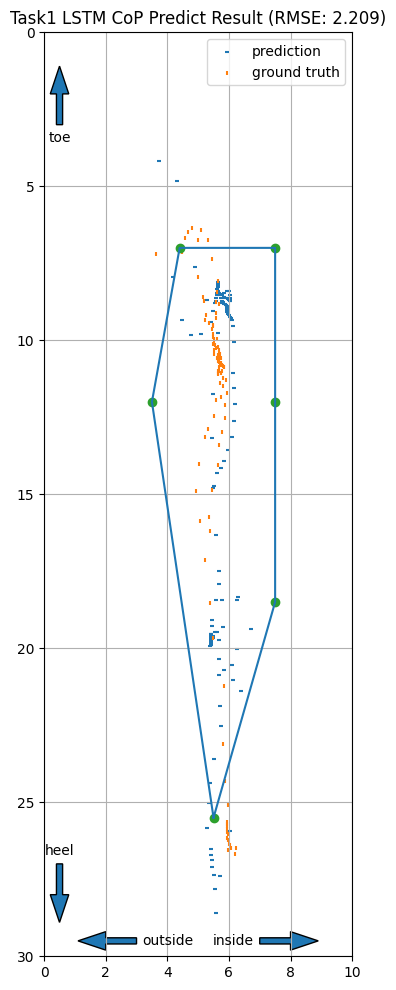

In [248]:
from fsr_predictor import get_best_checkpoint
from fsr_plot import plot_list, plot_force, plot_coord, plot_cop
from fsr_trainable import FSR_Trainable
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import PathCollection
from collections.abc import Sequence
import numpy as np
from copy import copy
from scipy.spatial import ConvexHull

FSR_CENTER = np.array([
    (15*0.5, 14*0.5),
    (15*0.5, 24*0.5),
    (7*0.5, 24*0.5),
    (11*0.5, 51*0.5),
    (4.4, 7),
    (7.5, 18.5)
])

# CoPX_FSR = (15*0.5*FSR_Bigtoe + 15*0.5*FSR_Right + 7*0.5*FSR_Left + 11*0.5*FSR_Heel + 4.4*FSR_Littletoe + 7.5*FSR_Center)/(FSR_Bigtoe + FSR_Right + FSR_Left + FSR_Heel + FSR_Littletoe + FSR_Center);
# CoPY_FSR = (14*0.5*FSR_Bigtoe + 24*0.5*FSR_Right + 24*0.5*FSR_Left + 51*0.5*FSR_Heel + 7*FSR_Littletoe + 18.5*FSR_Center)/(FSR_Bigtoe + FSR_Right + FSR_Left + FSR_Heel + FSR_Littletoe + FSR_Center);

ax = plt.subplot()
ax.figure.set_size_inches(10, 12)
experiment = 'FSR_Trainable_2023-08-10_18-18-32'
index = 0

def cop_plot(ax, experiment:str, index:int, task:int, time:Sequence=None, labels:Sequence='ABCDEF', postprocess:bool=False, standard='metric'):
    assert task in [1, 3, 4, 6]
    checkpoint, metric = get_best_checkpoint(experiment, standard, 'min')

    trainer = FSR_Trainable(config=metric['config'])
    trainer.restore(checkpoint)
    pred, y = trainer.eval()[index]

    time = time or range(0, len(pred))
    time = np.array(time)
    time = time[(0 <= time) & (time < len(pred))]

    # if postprocess:
    #     pred[pred < 0] = 0
    #     y[y < 0] = 0
    
    xlim = (0, 10)
    ylim = (30, 0)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_aspect('equal')
    cop_x = (pred[time, :6] * pred[time, 6:12]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_y = (pred[time, :6] * pred[time, 12:]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_x = cop_x[(pred[time, :6] != 0).any(axis=1)]
    cop_y = cop_y[(pred[time, :6] != 0).any(axis=1)]
    ax.scatter(cop_x, cop_y, s=5, marker='_')
    cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
    cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)
    cop_x = cop_x[(y[time, :6] != 0).any(axis=1)]
    cop_y = cop_y[(y[time, :6] != 0).any(axis=1)]
    ax.scatter(cop_x, cop_y, s=5, marker='|')
    plt.legend(['prediction', 'ground truth'])
    margin1 = .5
    margin2 = 3
    margin3 = 0.2
    arrow_length = 1
    arrow_width = .2
    ax.arrow(x=xlim[0]+margin1, y=ylim[1]+margin2, dx=0, dy=-arrow_length, width=arrow_width)
    ax.annotate('toe', xy=(xlim[0]+margin1, ylim[1]+margin2+margin3), ha='center', va='top')
    ax.arrow(x=xlim[0]+margin1, y=ylim[0]-margin2, dx=0, dy=arrow_length, width=arrow_width)
    ax.annotate('heel', xy=(xlim[0]+margin1, ylim[0]-margin2-margin3), ha='center', va='bottom')
    ax.arrow(x=xlim[0]+margin2, y=ylim[0]-margin1, dx=-arrow_length, dy=0, width=arrow_width)
    ax.annotate('outside', xy=(xlim[0]+margin2+margin3, ylim[0]-margin1), ha='left', va='center')
    ax.arrow(x=xlim[1]-margin2, y=ylim[0]-margin1, dx=arrow_length, dy=0, width=arrow_width)
    ax.annotate('inside', xy=(xlim[1]-margin2-margin3, ylim[0]-margin1), ha='right', va='center')
    ax.scatter(FSR_CENTER[:, 0], FSR_CENTER[:, 1])
    hull = ConvexHull(FSR_CENTER)
    hull = np.append(hull.vertices, hull.vertices[0])
    ax.plot(FSR_CENTER[hull, 0], FSR_CENTER[hull, 1])

    title_value = metric['rmse_coord']
    title_model = metric['config']['model']
    if title_model == 'fsr_model.LSTM':
        title_model = 'LSTM'
    elif title_model == 'fsr_model.CNN_LSTM':
        title_model = 'CNN-LSTM'
    elif title_model == 'fsr_model.ANN':
        title_model = 'Perceptron'
    else:
        raise ValueError(f'unknown model {title_model}')
    title = f'Task{task} {title_model} CoP Predict Result (RMSE: {title_value:.3f})'
    ax.set_title(title)
    ax.grid()

cop_plot(ax, experiment, index, labels='ABCDEF', postprocess=True, task=1)

In [250]:
index

0

Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict


/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is

not found optimizer state dict


Failed to read the results for 1 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_14-56-54/FSR_Trainable_35a8f235_42_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_15-08-27
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.jso

not found optimizer state dict


/tmp/ipykernel_62132/263973349.py:66: RuntimeWarning: invalid value encountered in divide
  cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
/tmp/ipykernel_62132/263973349.py:67: RuntimeWarning: invalid value encountered in divide
  cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)


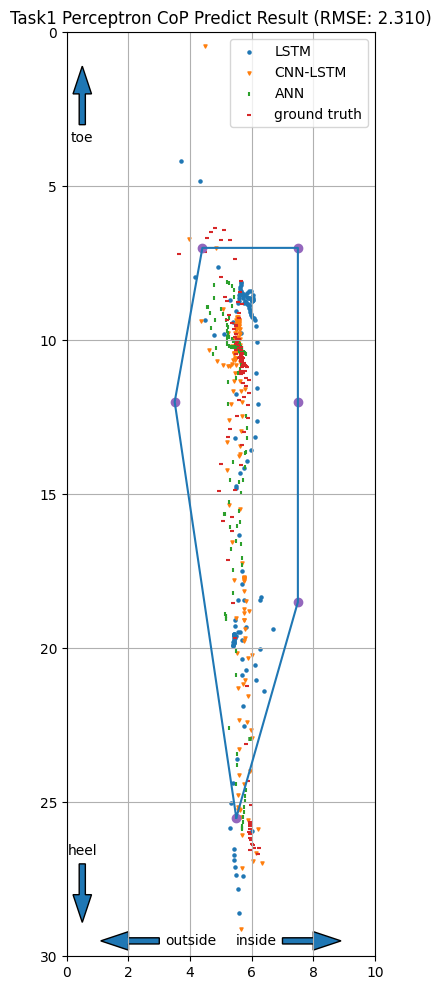

In [249]:
ax = plt.subplot()
ax.figure.set_size_inches(10, 12)



def cop_plot2(ax, index:int, task:int, time:Sequence=None, labels:Sequence='ABCDEF', postprocess:bool=False, standard='metric'):
    assert task in [1, 3, 4, 6]

    xlim = (0, 10)
    ylim = (30, 0)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_aspect('equal')

    checkpoint, metric = get_best_checkpoint('FSR_Trainable_2023-08-10_18-18-32', standard, 'min')
    trainer = FSR_Trainable(config=metric['config'])
    trainer.restore(checkpoint)
    pred, y = trainer.eval()[index]
    time = time or range(0, len(pred))
    time = np.array(time)
    time = time[(0 <= time) & (time < len(pred))]
    # if postprocess:
    #     pred[pred < 0] = 0
    #     y[y < 0] = 0
    cop_x = (pred[time, :6] * pred[time, 6:12]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_y = (pred[time, :6] * pred[time, 12:]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_x = cop_x[(pred[time, :6] != 0).any(axis=1)]
    cop_y = cop_y[(pred[time, :6] != 0).any(axis=1)]
    ax.scatter(cop_x, cop_y, s=5, marker='o')
    # cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
    # cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)
    # cop_x = cop_x[(y[time, :6] != 0).any(axis=1)]
    # cop_y = cop_y[(y[time, :6] != 0).any(axis=1)]
    # ax.scatter(cop_x, cop_y, s=5, marker='|')

    checkpoint, metric = get_best_checkpoint('FSR_Trainable_2023-08-10_16-28-50', standard, 'min')
    trainer = FSR_Trainable(config=metric['config'])
    trainer.restore(checkpoint)
    pred, y = trainer.eval()[index]
    # if postprocess:
    #     pred[pred < 0] = 0
    #     y[y < 0] = 0
    cop_x = (pred[time, :6] * pred[time, 6:12]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_y = (pred[time, :6] * pred[time, 12:]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_x = cop_x[(pred[time, :6] != 0).any(axis=1)]
    cop_y = cop_y[(pred[time, :6] != 0).any(axis=1)]
    ax.scatter(cop_x, cop_y, s=5, marker='v')
    # cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
    # cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)
    # cop_x = cop_x[(y[time, :6] != 0).any(axis=1)]
    # cop_y = cop_y[(y[time, :6] != 0).any(axis=1)]
    # ax.scatter(cop_x, cop_y, s=5, marker='|')

    checkpoint, metric = get_best_checkpoint('FSR_Trainable_2023-08-10_14-56-54', standard, 'min')
    trainer = FSR_Trainable(config=metric['config'])
    trainer.restore(checkpoint)
    pred, y = trainer.eval()[index]
    # if postprocess:
    #     pred[pred < 0] = 0
    #     y[y < 0] = 0
    cop_x = (pred[time, :6] * pred[time, 6:12]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_y = (pred[time, :6] * pred[time, 12:]).sum(axis=1)/pred[time, :6].sum(axis=1)
    cop_x = cop_x[(pred[time, :6] != 0).any(axis=1)]
    cop_y = cop_y[(pred[time, :6] != 0).any(axis=1)]
    ax.scatter(cop_x, cop_y, s=5, marker='|')
    cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
    cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)
    cop_x = cop_x[(y[time, :6] != 0).any(axis=1)]
    cop_y = cop_y[(y[time, :6] != 0).any(axis=1)]
    ax.scatter(cop_x, cop_y, s=5, marker='_')



    
    # plt.legend(['LSTM', 'CNN-LSTM', 'ANN'])
    plt.legend(['LSTM', 'CNN-LSTM', 'ANN', 'ground truth'])

    margin1 = .5
    margin2 = 3
    margin3 = 0.2
    arrow_length = 1
    arrow_width = .2
    ax.arrow(x=xlim[0]+margin1, y=ylim[1]+margin2, dx=0, dy=-arrow_length, width=arrow_width)
    ax.annotate('toe', xy=(xlim[0]+margin1, ylim[1]+margin2+margin3), ha='center', va='top')
    ax.arrow(x=xlim[0]+margin1, y=ylim[0]-margin2, dx=0, dy=arrow_length, width=arrow_width)
    ax.annotate('heel', xy=(xlim[0]+margin1, ylim[0]-margin2-margin3), ha='center', va='bottom')
    ax.arrow(x=xlim[0]+margin2, y=ylim[0]-margin1, dx=-arrow_length, dy=0, width=arrow_width)
    ax.annotate('outside', xy=(xlim[0]+margin2+margin3, ylim[0]-margin1), ha='left', va='center')
    ax.arrow(x=xlim[1]-margin2, y=ylim[0]-margin1, dx=arrow_length, dy=0, width=arrow_width)
    ax.annotate('inside', xy=(xlim[1]-margin2-margin3, ylim[0]-margin1), ha='right', va='center')
    ax.scatter(FSR_CENTER[:, 0], FSR_CENTER[:, 1])
    hull = ConvexHull(FSR_CENTER)
    hull = np.append(hull.vertices, hull.vertices[0])
    ax.plot(FSR_CENTER[hull, 0], FSR_CENTER[hull, 1])

    title_value = metric['rmse_coord']
    title_model = metric['config']['model']
    if title_model == 'fsr_model.LSTM':
        title_model = 'LSTM'
    elif title_model == 'fsr_model.CNN_LSTM':
        title_model = 'CNN-LSTM'
    elif title_model == 'fsr_model.ANN':
        title_model = 'Perceptron'
    else:
        raise ValueError(f'unknown model {title_model}')
    title = f'Task{task} {title_model} CoP Predict Result (RMSE: {title_value:.3f})'
    ax.set_title(title)
    ax.grid()

def wma(ax, index):
    import fsr_data
    fsr_data.get_data()
    ax.scatter()

cop_plot2(ax, index, labels='ABCDEF', postprocess=True, task=1)
# cop_plot(ax, 'FSR_Trainable_2023-08-10_18-18-32', index, labels='ABCDEF', postprocess=True, task=1) # LSTM
# cop_plot(ax, 'FSR_Trainable_2023-08-10_16-28-50', index, labels='ABCDEF', postprocess=True, task=1) # CNN-LSTM
# cop_plot(ax, 'FSR_Trainable_2023-08-10_14-56-54', index, labels='ABCDEF', postprocess=True, task=1) # ANN

In [165]:
import fsr_data
fsr_data.get_file_data().reset_index().groupby('pose').first()
# fsr_data.get_file_data()

,index,subject,filename,path
pose,,,,
gait10,0,0,GAIT10-2.pickle,/home/seokj/workspace/FSR-prediction/data/0/ga...
gait5,2,0,GAIT05.pickle,/home/seokj/workspace/FSR-prediction/data/0/ga...
scan,4,0,SCAN2.pickle,/home/seokj/workspace/FSR-prediction/data/0/sc...
squat,6,0,SQUAT1.pickle,/home/seokj/workspace/FSR-prediction/data/0/sq...
sts,8,0,STS2.pickle,/home/seokj/workspace/FSR-prediction/data/0/st...


<class 'matplotlib.axes._axes.Axes'>


Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict


/tmp/ipykernel_62132/2657762269.py:52: RuntimeWarning: invalid value encountered in divide
  cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
/tmp/ipykernel_62132/2657762269.py:53: RuntimeWarning: invalid value encountered in divide
  cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)
Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress t

not found optimizer state dict


/tmp/ipykernel_62132/2657762269.py:52: RuntimeWarning: invalid value encountered in divide
  cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
/tmp/ipykernel_62132/2657762269.py:53: RuntimeWarning: invalid value encountered in divide
  cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)
Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress t

not found optimizer state dict


Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict


Failed to read the results for 2 trials:
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_1a76a8a6_33_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-35-52
- /home/seokj/ray_results/FSR_Trainable_2023-08-10_18-18-32/FSR_Trainable_3d8c1dc7_11_criterion=torch_nn_MSELoss,data_loader=fsr_data_get_index_splited_by_time,imputer=sklearn_impute_SimpleI_2023-08-10_18-20-39
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/trainable/trainable.py:1094: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  self._result_logger = UnifiedLogger(config, self._logdir, loggers=None)
/home/seokj/workspace/.venv/lib/python3.10/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated a

not found optimizer state dict


/tmp/ipykernel_62132/2657762269.py:52: RuntimeWarning: invalid value encountered in divide
  cop_x = (y[time, :6] * y[time, 6:12]).sum(axis=1)/y[time, :6].sum(axis=1)
/tmp/ipykernel_62132/2657762269.py:53: RuntimeWarning: invalid value encountered in divide
  cop_y = (y[time, :6] * y[time, 12:]).sum(axis=1)/y[time, :6].sum(axis=1)


Text(0.5, 1.0, 'STS')

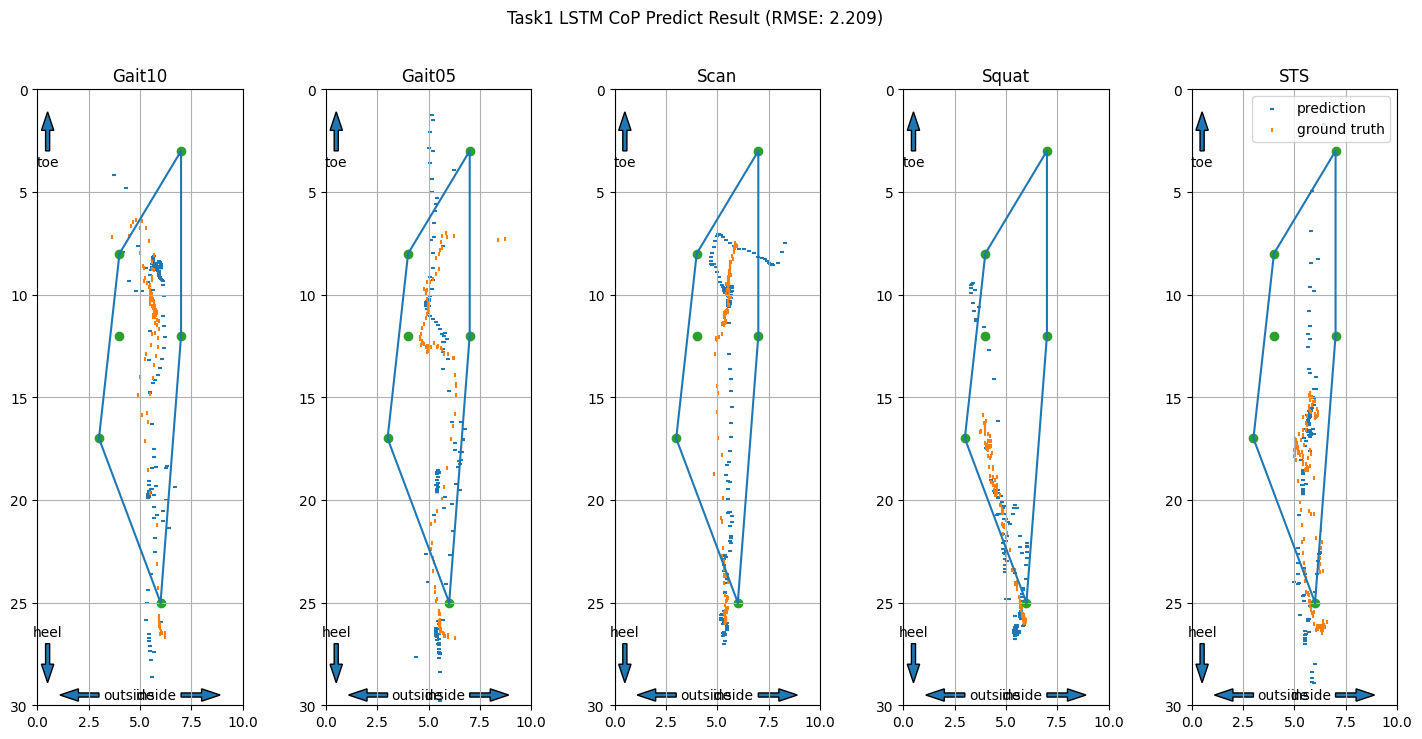

In [193]:
fig, ax = plt.subplots(1, 5, figsize=(18, 8))
experiment = 'FSR_Trainable_2023-08-10_18-18-32'
print(type(ax[0]))
cop_plot(ax[0], experiment, 0, labels='ABCDEF', postprocess=True, task=1)
cop_plot(ax[1], experiment, 2, labels='ABCDEF', postprocess=True, task=1)
cop_plot(ax[2], experiment, 4, labels='ABCDEF', postprocess=True, task=1)
cop_plot(ax[3], experiment, 6, labels='ABCDEF', postprocess=True, task=1)
cop_plot(ax[4], experiment, 8, labels='ABCDEF', postprocess=True, task=1)
title = ax[0].get_title()
fig.suptitle(title)
ax[0].set_title('Gait10')
ax[1].set_title('Gait05')
ax[2].set_title('Scan')
ax[3].set_title('Squat')
ax[4].set_title('STS')